# Preprocess pictures for training

## Imports

In [1]:
import cv2 as cv
import os
import numpy as np
from tqdm.notebook import tqdm
import imutils
from imutils.face_utils import FaceAligner
from imutils.face_utils import rect_to_bb
import dlib
import matplotlib.pyplot as plt

In [2]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
fa = FaceAligner(predictor, desiredFaceWidth=224)

## Main function

In [3]:
def preprocess_face(img, mask):
    # Should be applied on an already cropped picture,
    # since the saved pictures are already cropped 
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    faces = detector(gray, 2)
    
    if len(faces) > 0:
        # if a face is detected, align it
        face = faces[0]
        (x, y, w, h) = rect_to_bb(face)
        gray = fa.align(gray, gray, face)
    else:
        # otherwise, we know it's there, so
        # just resize it
        gray = cv.resize(gray, (224, 224))
    # equalize histogram
    gray = cv.equalizeHist(gray)
    
    # apply mask
    gray[~mask] = 0
    return gray

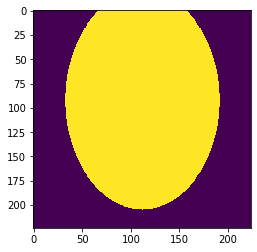

In [4]:
a, b = 92, 112
n = 224
r = 112
y,x = np.ogrid[-a:n-a, -b:n-b]
mask = x*x + y*y/2 <= r*r/2
plt.imshow(mask)
plt.show()

In [5]:
cap = cv.VideoCapture(0)
result, img = cap.read()
img = cv.flip(img, 1)
processed_face = preprocess_face(img, mask)
cap.release()

Original picture:

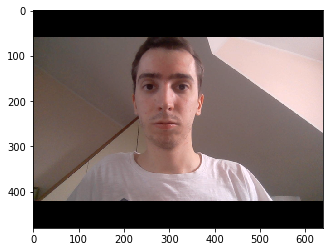

In [6]:
plt.imshow(img[:,:,::-1])
plt.show()

Processed picture for training:

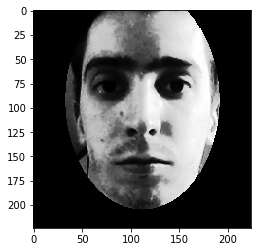

In [7]:
plt.imshow(processed_face, cmap="gray")
plt.show()

## Apply preprocess function to saved pictures

In [ ]:
def preprocess_faces(src_dir, dest_dir, mask):
    for file in tqdm(os.listdir(src_dir)):

        img = cv.imread(src_dir+"/"+file)
        os.makedirs(dest_dir, exist_ok=True)
        
        prep_img = preprocess_face(img, mask)
        
        cv.imwrite(dest_dir+"/"+file, prep_img)


In [ ]:
# takes a while
# could be made faster by first resizing the picture and then applying the face detector
srcdir = "pictures_new/"
outdir = "pictures_masked/"
for name in os.listdir(srcdir): # or choose the folders of interest
    indir = srcdir+name
    destdir = outdir+name
    # print(indir, destdir)
    preprocess_faces(indir, destdir, mask)